In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from lib.RedDotsData import RedDotsData
from lib.FolderStructure import FolderStructure
from lib.DriftData import DriftData

#rootDir ="C:/workspaces/AnjutkaVideo/Kara_Sea_Crab_Video_st_5993_2018/"
#videoFileName = "V3__R_20180915_205551"
#videoFileName = "V4__R_20180915_210447"
#videoFileName = "V6__R_20180915_212238"


#rootDir ="C:/workspaces/AnjutkaVideo/2019-Kara/St6279_19"
#videoFileName = "V2"

rootDir = "C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBlagopoluchiyaBay2018/"
videoFileName = "V3_R_20180911_170159"
#videoFileName = "V2_R_20180911_165730"
#videoFileName = "V1_R_20180911_165259"

folderStruct = FolderStructure(rootDir, videoFileName)

drifts = DriftData.createFromFolderStruct(folderStruct)
maxFrameID = drifts.maxFrameID()
minFrameID = drifts.minFrameID()
#maxFrameID = 49
#minFrameID = 36281

rdd = RedDotsData.createFromFolderStruct(folderStruct) #.getRedDotsFilepath())
rdd.getCount()

4633

In [2]:
#rdd.replaceOutlierBetweenTwo()
#rdd.getCount()

In [3]:
dfToPlot = rdd.forPlotting()
dfToPlot.count()[0] #head(10)

4588

In [4]:
lowerFrameID = minFrameID
upperFrameID = maxFrameID
#lowerFrameID = 49
#upperFrameID = 36281

#lowerFrameID = 4000
#upperFrameID = 6000


zoomDF = dfToPlot.loc[dfToPlot['frameNumber'] > lowerFrameID].loc[dfToPlot['frameNumber'] < upperFrameID]

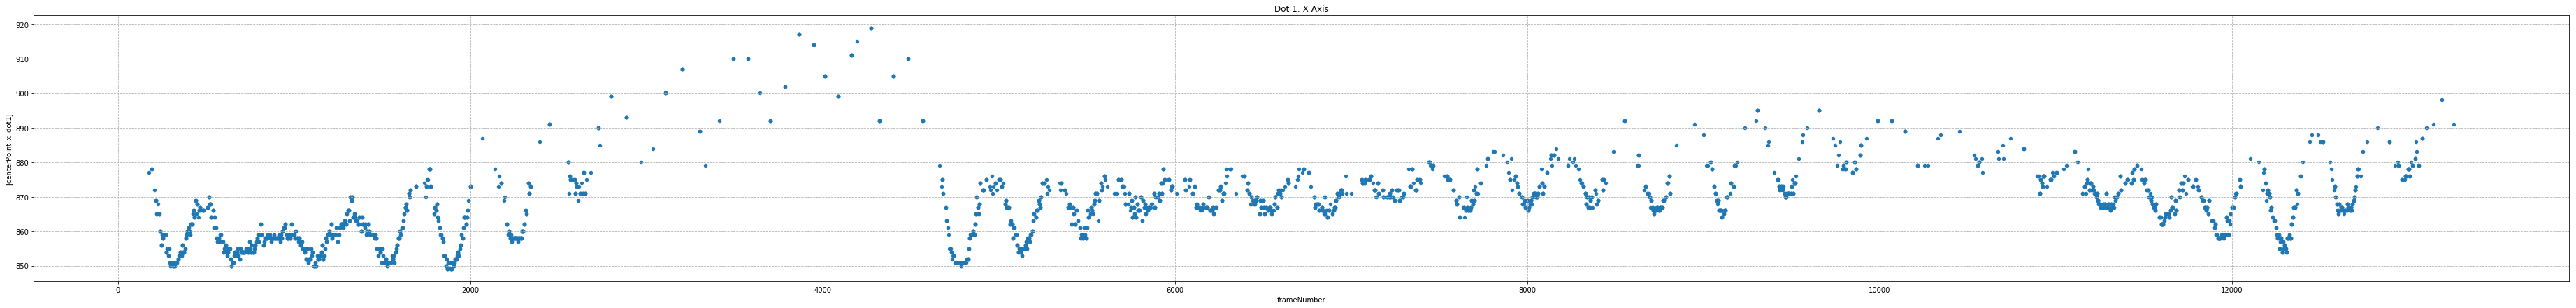

In [5]:
zoomDF.plot.scatter(x='frameNumber', y=['centerPoint_x_dot1'],figsize=(65,7), title="Dot 1: X Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

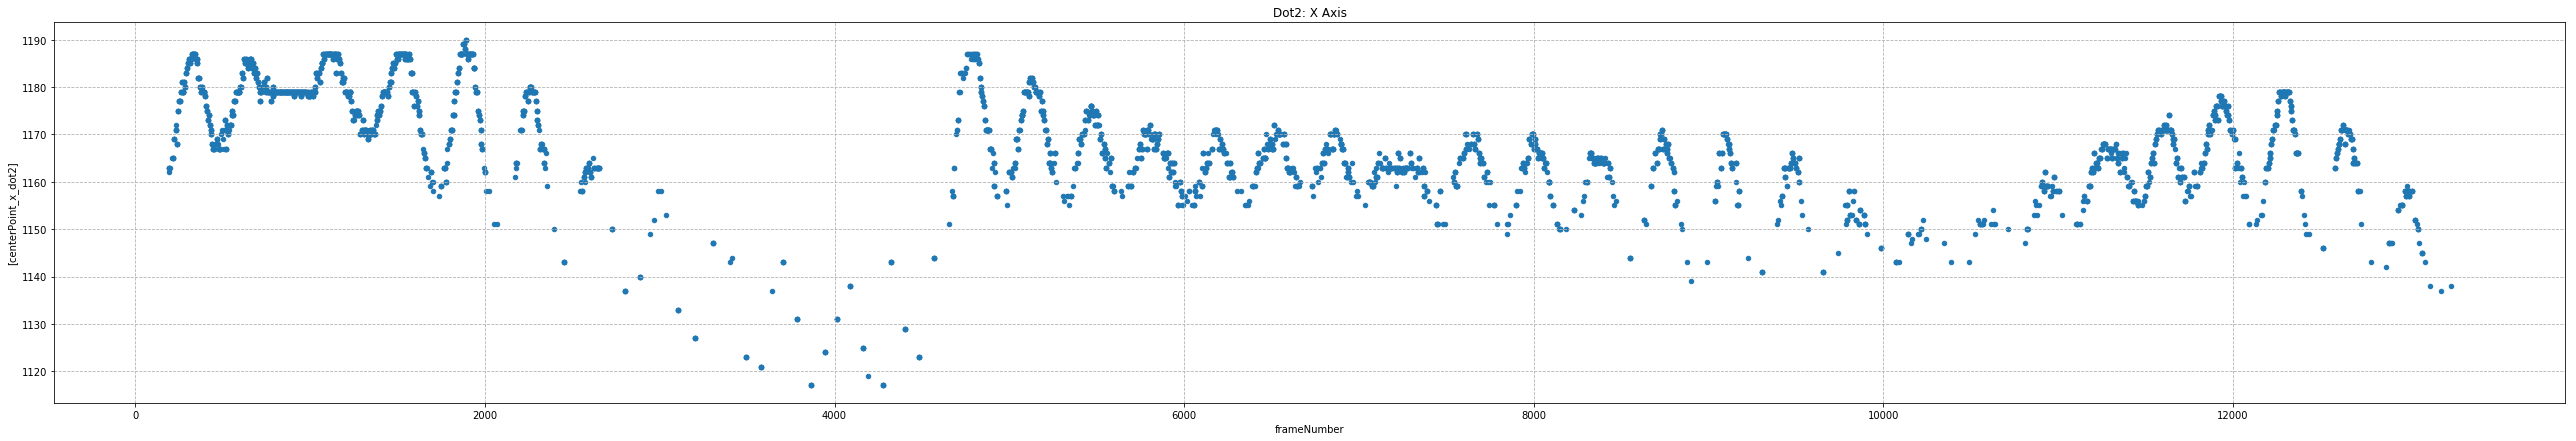

In [6]:
zoomDF.plot.scatter(x='frameNumber', y=['centerPoint_x_dot2'],figsize=(45,7), title="Dot2: X Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

In [18]:
df = rdd.interpolated(minFrameID, maxFrameID)
df = rdd.interpolated()

#rdd.saveInterpolatedDFToFile(minFrameID, maxFrameID)
df.count()[0]
#df.head(10)

16062

c:\old\python27\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


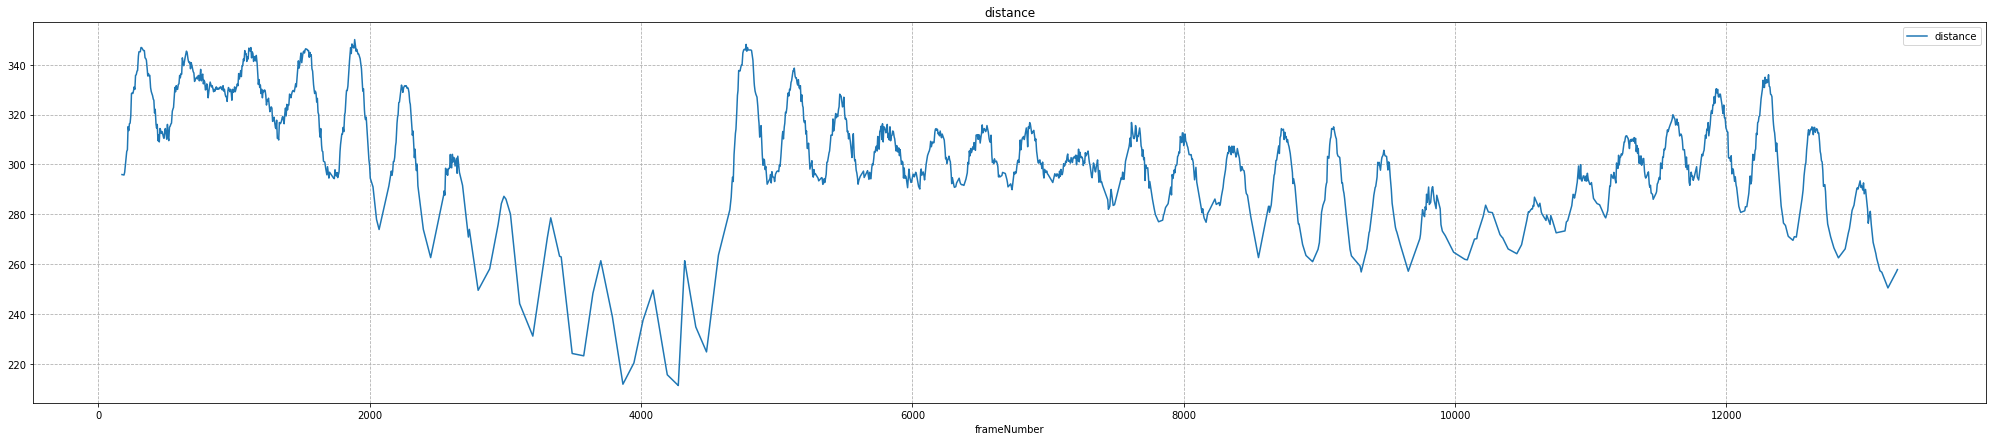

In [8]:
df.plot(x='frameNumber', y=['distance'],figsize=(35,7), title="distance")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

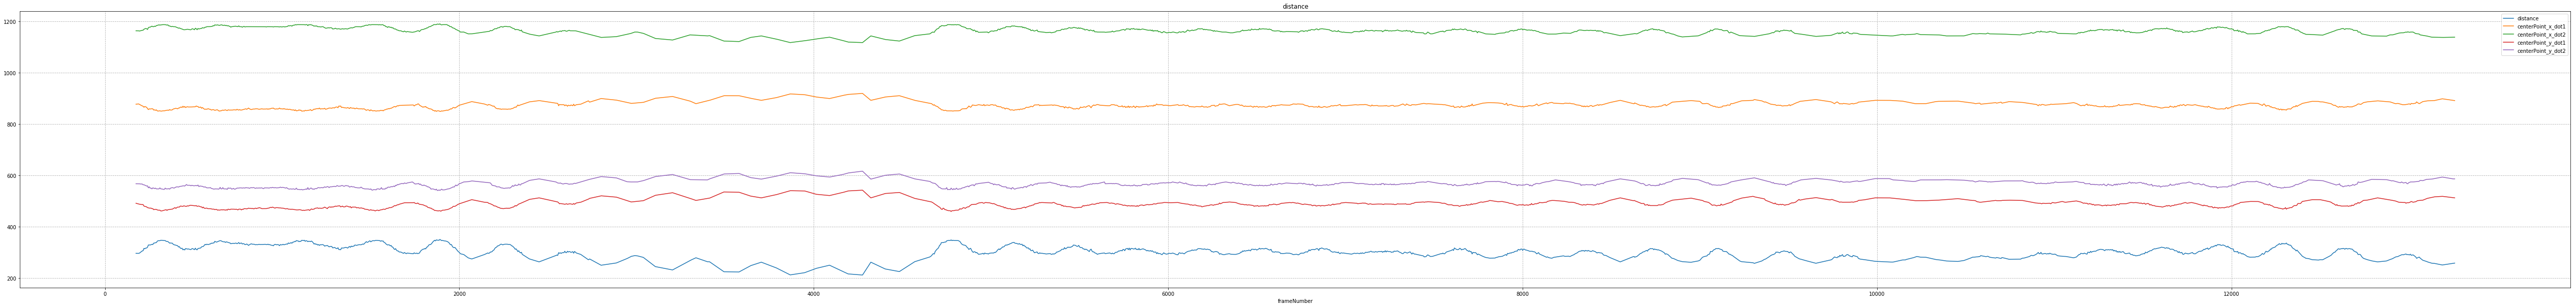

In [9]:
df.plot(x='frameNumber', y=['distance','centerPoint_x_dot1', 'centerPoint_x_dot2','centerPoint_y_dot1', 'centerPoint_y_dot2'],figsize=(90,10), title="distance")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

In [10]:
dataRedDot2 = rdd.onlyRedDot2()
dataRedDot2.count()[0]

2306

In [11]:
#dataRedDot2 = replaceOutlierBetweenTwo(dataRedDot2, 'centerPoint_x')
dataRedDot1 = rdd.onlyRedDot1()
dataRedDot1.count()[0]
#dataRedDot1['frameNumber']


2197

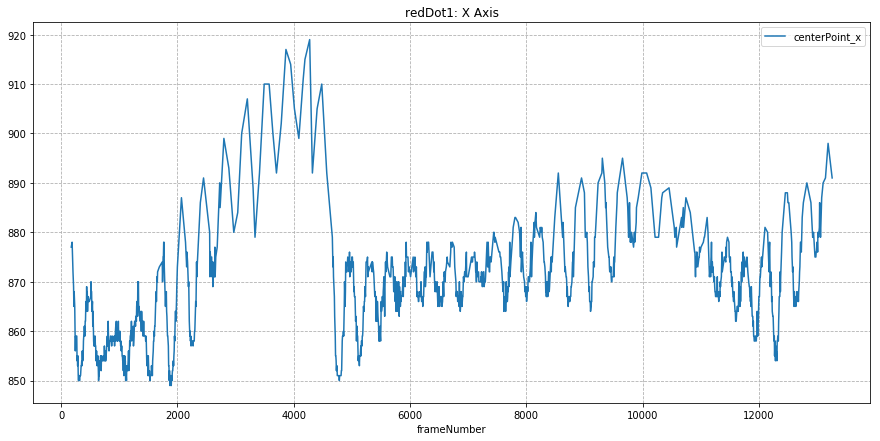

In [12]:
dataRedDot1.plot(x='frameNumber', y=['centerPoint_x'],figsize=(15,7), title="redDot1: X Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

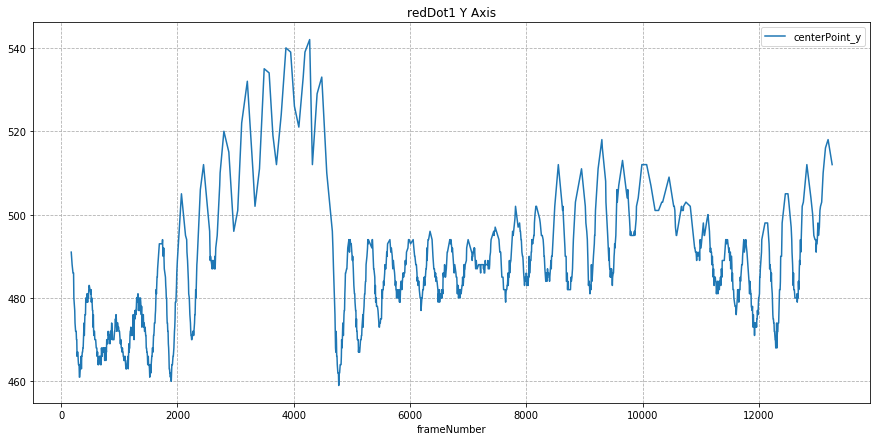

In [13]:
dataRedDot1.plot(x='frameNumber', y=['centerPoint_y'],figsize=(15,7), title="redDot1 Y Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

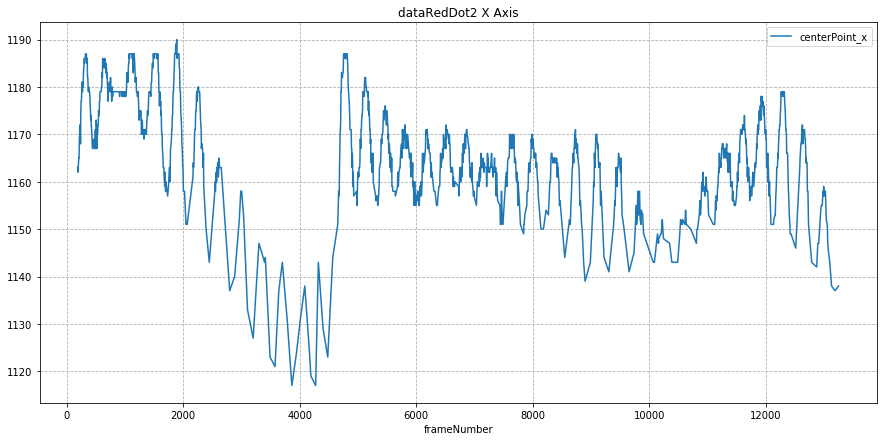

In [14]:
dataRedDot2.plot(x='frameNumber', y=['centerPoint_x'],figsize=(15,7), title="dataRedDot2 X Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

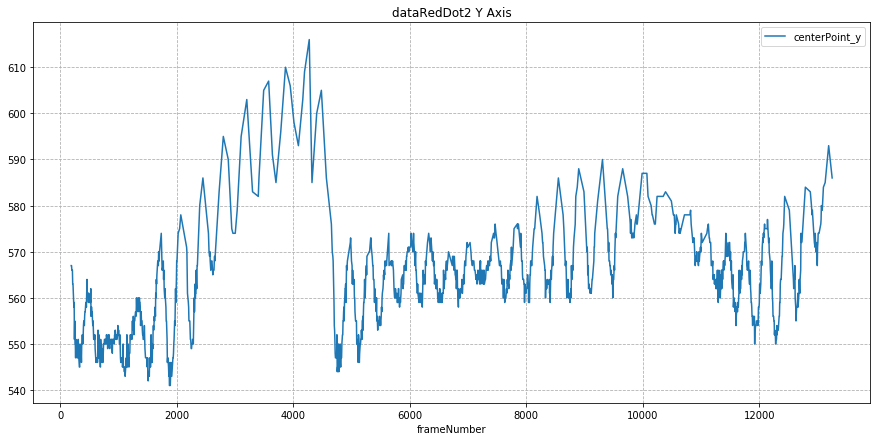

In [15]:
dataRedDot2.plot(x='frameNumber', y=['centerPoint_y'],figsize=(15,7), title="dataRedDot2 Y Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

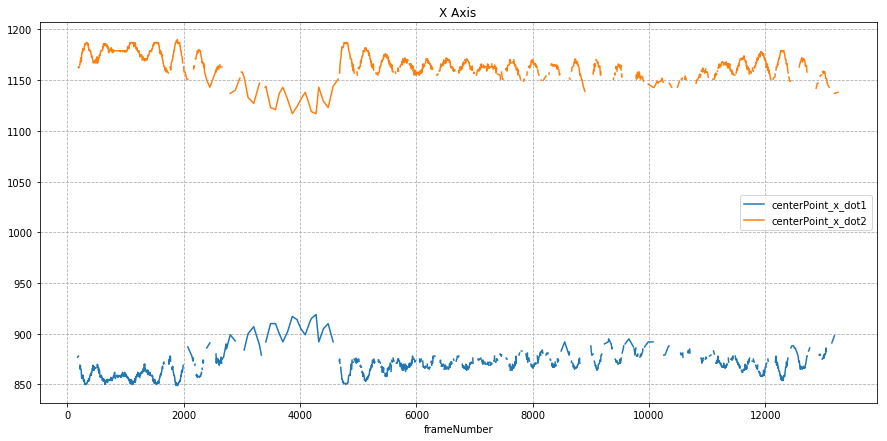

In [16]:
dfToPlot.plot(x='frameNumber', y=['centerPoint_x_dot1','centerPoint_x_dot2'],figsize=(15,7), title="X Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

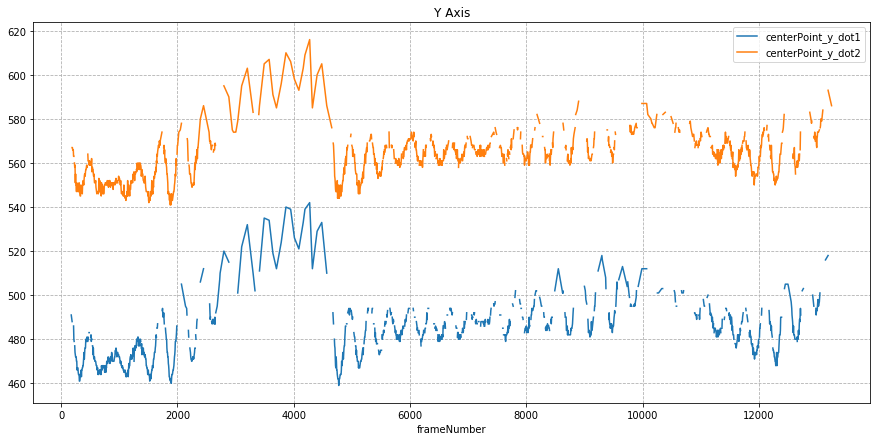

In [17]:
dfToPlot.plot(x='frameNumber', y=['centerPoint_y_dot1','centerPoint_y_dot2'],figsize=(15,7), title="Y Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines